# STINTSY S14 MP

### Group Members:
- ALCANTARA, KEIRA GABRIELLE CAFE
- DE JESUS, IAN GABRIEL SANDOVAL
- DIWAJON, HECTOR ZACHARY CALLANGA
- RESURRECCION, ALJIRAH BRENDL YUTAN

## **Section 1. Introduction**

## **Section 2. Dataset Columns and Descriptions**

| Column Name        | Description                                                  |
|--------------------|--------------------------------------------------------------|
| W_REGN             | Regions ranging from 1 to 16 (only exception is 4 having the numbers 41 for Region IVa and 42 for Region IVb)|
| W_OID              | Other ID's for each province arranged in increments of one alphabetically up to the last. (Abra being 1, Agusan Del Norte 2 and so on)|
| W_SHSN             | Sample household serial number. |

## **Section 3. Imported Libraries:** 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Section 4. Data Preprocessing and Cleaning:**

In [7]:
ds_income_df = pd.read_csv("FIES PUF 2012 Vol.1.CSV")
ds_income_df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5


In [8]:
ds_income_df.info()

observation_count, variables_count = ds_income_df.shape
print("\nNumber of observations:", observation_count)
print("Number of variables:", variables_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(5), int64(92), object(22)
memory usage: 36.5+ MB

Number of observations: 40171
Number of variables: 119


#### **Checking for duplicate instances**

In [10]:
duplicates = ds_income_df[ds_income_df.duplicated()]

print("Number of duplicate rows:", duplicates.shape[0])
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [W_REGN, W_OID, W_SHSN, W_HCN, URB, RSTR, PSU, BWEIGHT, RFACT, FSIZE, AGRI_SAL, NONAGRI_SAL, WAGES, NETSHARE, CASH_ABROAD, CASH_DOMESTIC, RENTALS_REC, INTEREST, PENSION, DIVIDENDS, OTHER_SOURCE, NET_RECEIPT, REGFT, NET_CFG, NET_LPR, NET_FISH, NET_FOR, NET_RET, NET_MFG, NET_COM, NET_TRANS, NET_MIN, NET_CONS, NET_NEC, EAINC, TOINC, LOSSES, T_BREAD, T_MEAT, T_FISH, T_MILK, T_OIL, T_FRUIT, T_VEG, T_SUGAR, T_FOOD_NEC, T_COFFEE, T_MINERAL, T_ALCOHOL, T_TOBACCO, T_OTHER_VEG, T_FOOD_HOME, T_FOOD_OUTSIDE, T_FOOD, T_CLOTH, T_FURNISHING, T_HEALTH, T_HOUSING_WATER, T_ACTRENT, T_RENTVAL, T_IMPUTED_RENT, T_BIMPUTED_RENT, T_TRANSPORT, T_COMMUNICATION, T_RECREATION, T_EDUCATION, T_MISCELLANEOUS, T_OTHER_EXPENDITURE, T_OTHER_DISBURSEMENT, T_NFOOD, T_TOTEX, T_TOTDIS, T_OTHREC, T_TOREC, FOOD_ACCOM_SRVC, SEX, AGE, MS, HGC, JOB, OCCUP, KB, CW, HHTYPE, MEMBERS, AGELESS5, AGE5_17, EMPLOYED_PAY, EMPLOYED_PROF, SPOUSE_EMP, BLDG_TYPE, ROOF, WALLS, TENURE, HSE

### **Checking for null values**

Null values is checked two times. The first is to check for null values without replacing anything, and the second is to replace all empty or whitespaces within the dataset to NaN. 

In [13]:
# first check of missing/null values
missing_values = ds_income_df.isnull().sum()
print(missing_values)

W_REGN    0
W_OID     0
W_SHSN    0
W_HCN     0
URB       0
         ..
PCINC     0
NATPC     0
NATDC     0
REGDC     0
REGPC     0
Length: 119, dtype: int64


In [14]:
# second check replacing placeholder values to NaN
ds_income_df.replace(["?", "N/A"], pd.NA, inplace=True)  # Convert common placeholders to NaN
ds_income_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)  # Converts empty strings with spaces to NaN

missing_values = ds_income_df.isnull().sum()

missing_values = missing_values[missing_values > 0]
print(missing_values)

OCCUP               7374
KB                  7374
CW                  7374
AGELESS5           15361
AGE5_17             8237
EMPLOYED_PAY        8296
EMPLOYED_PROF      12698
DISTANCE           16806
RADIO_QTY          16053
TV_QTY              7812
CD_QTY             14266
STEREO_QTY         23013
REF_QTY            17781
WASH_QTY           20106
AIRCON_QTY         25630
CAR_QTY            26157
LANDLINE_QTY       26133
CELLPHONE_QTY       6425
PC_QTY             23430
OVEN_QTY           24133
MOTOR_BANCA_QTY    27536
MOTORCYCLE_QTY     23128
dtype: int64


In [15]:
# checking of unique values

for column in ds_income_df.columns:
    unique_values = ds_income_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'W_REGN': [14 16  6  5 15  3  2 41  7 10 11  8  1 13 42 12  9]
Unique values in column 'W_OID': [ 101001000  101002000  101023000 ... 9804028001 9804029001 9804035000]
Unique values in column 'W_SHSN': [ 2  3  4  5 10 14 16 18 20 21 22 24  1  6  7  8  9 11 12 13 17 19 15 23
 25 26 27 28 29 30]
Unique values in column 'W_HCN': [  25   43   62   79  165  229  262  295  329  344  362  392   27   44
   89  113  140  162  185  209  233  256  281  302  325  418    3    1
   17  121  139  157  174  191  222  255  273  307  324  340  358   61
 8001 8002   77  160  177  226  339  378   13   21   28   36   45   64
   87   96  105  114  130  146  154  171   20   76   90  104  118  133
  148  161  188   11   32   52   72   83   93  115  125  135  143  151
  173  216  227    4   56   68  111  123  156  166  189  200  219  228
   10   30   41   59   78  107  117  178    5    7   19  102  124  136
  195    9   24   40   48   51   54   58   15   34   74   81   99  108
  127  15

After checking and replacing for null and duplicate values, the next challenge would be to identify which features are kept and dropped. Having way too many features could lead our model to overfitting and too little could lead to underfitting. Having looked through the data, there are too many specific/redundant features (ie. T_FISH, T_MEAT, ROOF, WALLS, etc.) and features with too many null values would be dropped. 

### **Dropping unecessary features**

In [18]:
df_clean = ds_income_df

In [19]:
# Drop unecessary/redundant features
df_clean.drop(columns=[
    "W_SHSN", "W_HCN", "BWEIGHT", "RFACT", "T_BREAD", "T_MEAT", "T_FISH", "T_MILK",
    "T_OIL", "T_FRUIT", "T_VEG", "T_SUGAR", "T_FOOD_NEC", "T_COFFEE", "T_MINERAL",
    "T_ALCOHOL", "T_TOBACCO", "T_OTHER_VEG", "T_FOOD_HOME", "T_FOOD_OUTSIDE", 
    "T_IMPUTED_RENT", "T_BIMPUTED_RENT", "EMPLOYED_PAY","EMPLOYED_PROF","BLDG_TYPE", 
    "ROOF","WALLS", "TENURE","HSE_ALTERTN", "TOILET", "ELECTRIC", "WATER", "DISTANCE", 
    "RADIO_QTY", "TV_QTY","CD_QTY", "STEREO_QTY", "REF_QTY", "WASH_QTY", "AIRCON_QTY", 
    "CAR_QTY", "LANDLINE_QTY","CELLPHONE_QTY", "PC_QTY", "OVEN_QTY", "MOTOR_BANCA_QTY",
    "MOTORCYCLE_QTY", "POP_ADJ"
], inplace=True)

threshold = 0.5 * len(df_clean)  # Define 50% missing threshold
df_clean.dropna(axis=1, thresh=threshold, inplace=True)  # Drop columns with too many NaN values

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   W_REGN                40171 non-null  int64  
 1   W_OID                 40171 non-null  int64  
 2   URB                   40171 non-null  int64  
 3   RSTR                  40171 non-null  int64  
 4   PSU                   40171 non-null  int64  
 5   FSIZE                 40171 non-null  float64
 6   AGRI_SAL              40171 non-null  int64  
 7   NONAGRI_SAL           40171 non-null  int64  
 8   WAGES                 40171 non-null  int64  
 9   NETSHARE              40171 non-null  int64  
 10  CASH_ABROAD           40171 non-null  int64  
 11  CASH_DOMESTIC         40171 non-null  int64  
 12  RENTALS_REC           40171 non-null  int64  
 13  INTEREST              40171 non-null  int64  
 14  PENSION               40171 non-null  int64  
 15  DIVIDENDS          

In [20]:
df_clean.head(10)

,W_REGN,W_OID,URB,RSTR,PSU,FSIZE,AGRI_SAL,NONAGRI_SAL,WAGES,NETSHARE,...,HHTYPE,MEMBERS,AGELESS5,AGE5_17,SPOUSE_EMP,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,21100,415052,3.0,0,0,0,0,...,2,3,NaN,01,3,108417.00,9,8,8,9
1,14,101001000,2,21100,415052,12.5,0,0,0,0,...,2,13,02,04,2,30631.60,5,9,9,4
2,14,101001000,2,21100,415052,2.0,0,0,0,31500,...,2,2,NaN,NaN,2,86992.50,9,6,6,8
3,14,101001000,2,21100,415052,4.0,0,0,0,0,...,1,4,NaN,02,2,43325.75,6,6,6,6
4,14,101001000,2,21100,415052,5.0,0,32000,32000,12600,...,2,5,NaN,02,2,37481.80,6,6,6,5
5,14,101001000,2,21100,415052,10.0,0,749628,749628,0,...,1,10,01,03,1,118554.90,9,10,10,9
6,14,101001000,2,21100,415052,1.0,0,0,0,71150,...,1,1,NaN,NaN,3,141000.00,10,5,5,10
7,14,101001000,2,21100,415052,6.0,2850,0,2850,0,...,1,6,01,03,2,14659.17,2,3,2,1
8,14,101001000,2,21100,415052,3.5,0,0,0,0,...,2,5,02,01,3,78478.86,8,8,8,8
9,14,101001000,2,21100,415052,6.0,0,0,0,0,...,2,6,01,01,2,24732.33,4,5,5,3


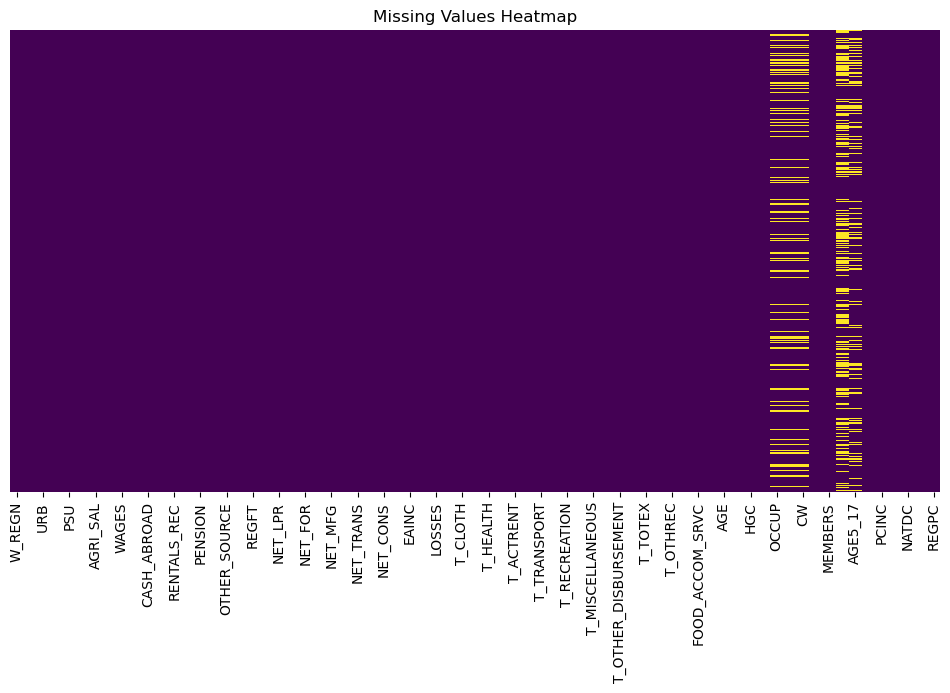

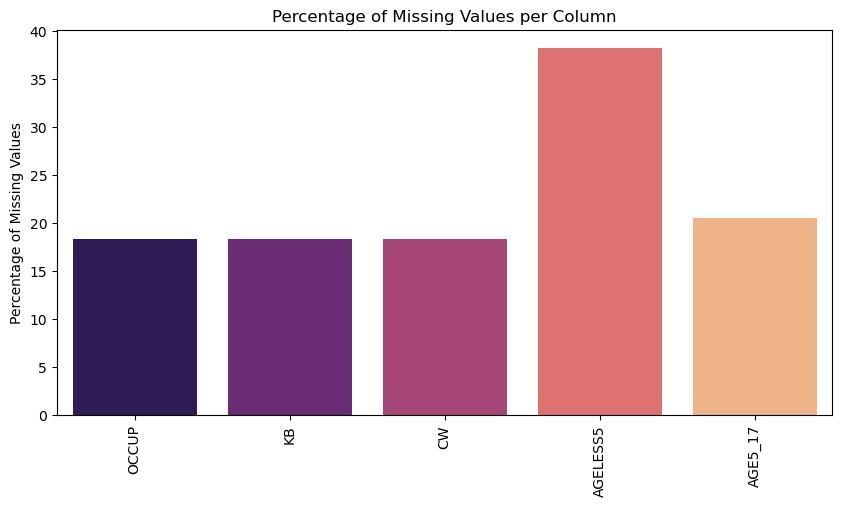

In [21]:
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_clean.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Bar plot showing % of missing values per column
missing_values = df_clean.isnull().mean() * 100  # Convert to percentage
missing_values = missing_values[missing_values > 0]  # Filter only those with missing values

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="magma")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values per Column")
plt.show()

Looking at the results and the metadata, interpolation will be used to fill the missing values for numeric columns. Since we are unsure on what a null value indicates, the best way would be to fill the missing values with the most frequently used value

In [23]:
print(df_clean["AGELESS5"].value_counts())

print("\n", df_clean["AGE5_17"].value_counts())

AGELESS5
00    11565
01     9403
02     3182
03      561
04       74
05       20
07        2
10        1
06        1
08        1
Name: count, dtype: int64

 AGE5_17
01    9568
02    7801
00    6014
03    4746
04    2395
05     955
06     327
07      91
08      21
09       8
10       3
14       2
13       1
11       1
12       1
Name: count, dtype: int64


In [24]:
# Fill in missing values with mode
mode_age5 = df_clean["AGELESS5"].mode()[0]  
df_clean["AGELESS5"] = df_clean["AGELESS5"].fillna(mode_age5)

mode_age17 = df_clean["AGE5_17"].mode()[0]  
df_clean["AGE5_17"] = df_clean["AGE5_17"].fillna(mode_age17) 

We observed that each there are missing values for categorical columns such as OCCUP, KB, and CW. For OCCUP and KB, each non-null value is categorized based on the range of numbers (ie. 1110-1490 belonging to the Government Official category). Binning would be the used to map each unique value to the correct category. 

In [26]:
# Define mapping for type of occupation
occupation_mapping = {
    (1110, 1490): "Officials",
    (2111, 2460): "Professionals",
    (3111, 3480): "Technicians",
    (4111, 4223): "Clerks",
    (5111, 5230): "Service Workers",
    (6111, 6590): "Farmers & Fishermen",
    (7111, 7442): "Trades Workers",
    (8111, 8340): "Machine Operators",
    (9111, 9333): "Laborers",
    (111, 113): "Special Occupations",
    (121, 129): "Other",
    (930, 930): "Other"
}

# Ensure OCCUP column is numeric
df_clean["OCCUP"] = pd.to_numeric(df_clean["OCCUP"], errors="coerce")

def categorize_occup(value):
    for (low, high), label in occupation_mapping.items():
        if low <= value <= high:
            return label
    return "Unknown"  # Default if no match

df_clean["OCCUP"] = df_clean["OCCUP"].apply(categorize_occup)

print(df_clean["OCCUP"].head(10))

0                Unknown
1              Officials
2                Unknown
3    Farmers & Fishermen
4        Service Workers
5    Farmers & Fishermen
6                Unknown
7    Farmers & Fishermen
8              Officials
9    Farmers & Fishermen
Name: OCCUP, dtype: object


In [27]:
# Define the mapping for kind of business/industry
kb_mapping = {
    (111, 329): "Agriculture, Forestry and Fishing",
    (510, 990): "Mining and Quarrying",
    (1011, 3320): "Manufacturing",
    (3510, 3530): "Electricity, Gas, Steam and Air Conditioning Supply",
    (3600, 3900): "Water Supply, Sewerage, Waste Management and Remediation Activities",
    (4100, 4390): "Construction",
    (4510, 4799): "Wholesale and Retail Trade; Repair of Motor Vehicles and Motorcycles",
    (4911, 5320): "Transportation and Storage",
    (5510, 5630): "Accommodation and Food Service Activities",
    (5811, 6399): "Information and Communication",
    (6411, 6630): "Financial and Insurance Activities",
    (6811, 6820): "Real Estate Activities",
    (6910, 7500): "Professional, Scientific and Technical Activities",
    (7710, 8299): "Administrative and Support Service Activities",
    (8411, 8430): "Public Administration and Defense; Compulsory Social Security",
    (8511, 8560): "Education",
    (8611, 8890): "Human Health and Social Work Services",
    (9000, 9329): "Arts, Entertainment and Recreation",
    (9411, 9690): "Other Service Activities",
    (9700, 9700): "Activities of Households as Employers of Domestic Personnel",
    (9901, 9909): "Activities of Extra-Territorial Organizations and Bodies",
}

# Ensure KB column is numeric
df_clean["KB"] = pd.to_numeric(df_clean["KB"], errors="coerce")

def categorize_kb(value):
    for (low, high), label in kb_mapping.items():
        if low <= value <= high:
            return label
    return "Unknown"  # Default if no match

df_clean["KB"] = df_clean["KB"].apply(categorize_kb)

print(df_clean["KB"].head(10))

0                                              Unknown
1    Wholesale and Retail Trade; Repair of Motor Ve...
2                                              Unknown
3                    Agriculture, Forestry and Fishing
4    Wholesale and Retail Trade; Repair of Motor Ve...
5                    Agriculture, Forestry and Fishing
6                                              Unknown
7                    Agriculture, Forestry and Fishing
8    Wholesale and Retail Trade; Repair of Motor Ve...
9                    Agriculture, Forestry and Fishing
Name: KB, dtype: object


In [28]:
# Define the mapping for class of worker
cw_mapping = { 
    1: "Worked for private establishment",
    2: "Worked for government/government corporation",
    3: "Self-employed without any employee",
    4: "Employer in own family-operated farm or business",
    5: "Worked with pay in own family-operated farm or business",
    6: "Worked without pay in own family-operated farm or business",
    0: "Worked for private household / Not Applicable"  # Default for unknown values
}

# Ensure CW column is numeric
df_clean["CW"] = pd.to_numeric(df_clean["CW"], errors="coerce")

# Map CW values directly
df_clean["CW"] = df_clean["CW"].map(cw_mapping).fillna("Worked for private household / Not Applicable")

print(df_clean["CW"].head(10))

0       Worked for private household / Not Applicable
1                  Self-employed without any employee
2       Worked for private household / Not Applicable
3    Employer in own family-operated farm or business
4                    Worked for private establishment
5    Employer in own family-operated farm or business
6       Worked for private household / Not Applicable
7                  Self-employed without any employee
8                  Self-employed without any employee
9                  Self-employed without any employee
Name: CW, dtype: object


## **Section 5. Exploratory Data Analysis**

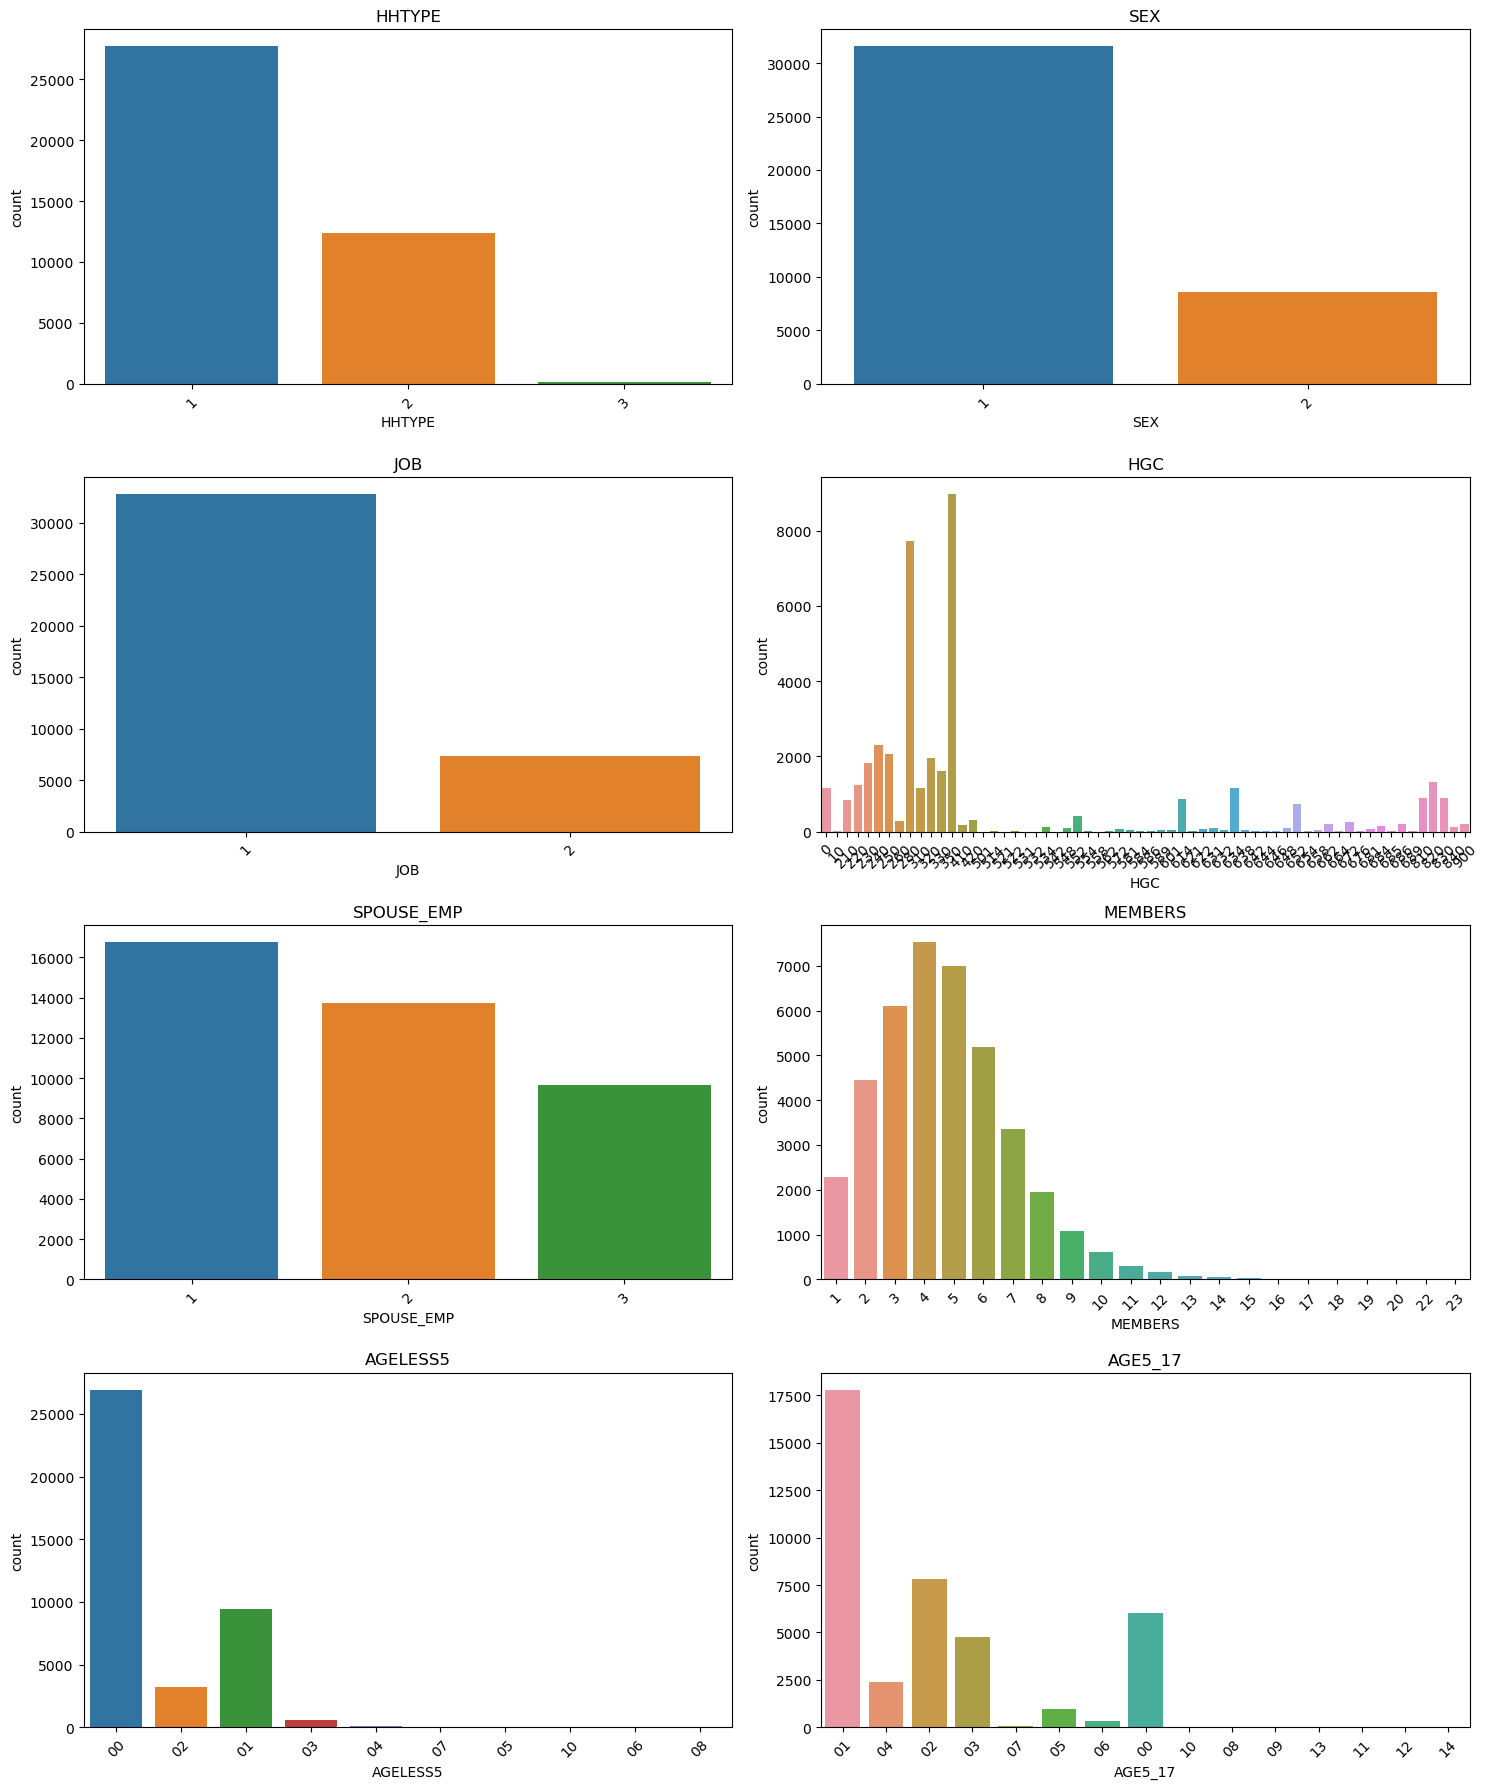

In [77]:
# Define the figure with a grid of subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(15, 18))

# List of categorical variables
categorical_vars = ['HHTYPE', 'SEX', 'JOB', 'HGC', 'SPOUSE_EMP', 'MEMBERS', 'AGELESS5', 'AGE5_17']

# Create count plots in each subplot
for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 2)  # Calculate row & column indices
    sns.countplot(x=var, data=df_clean, ax=axes[row, col])
    axes[row, col].set_title(var)
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

*INSERT EXPLANATION

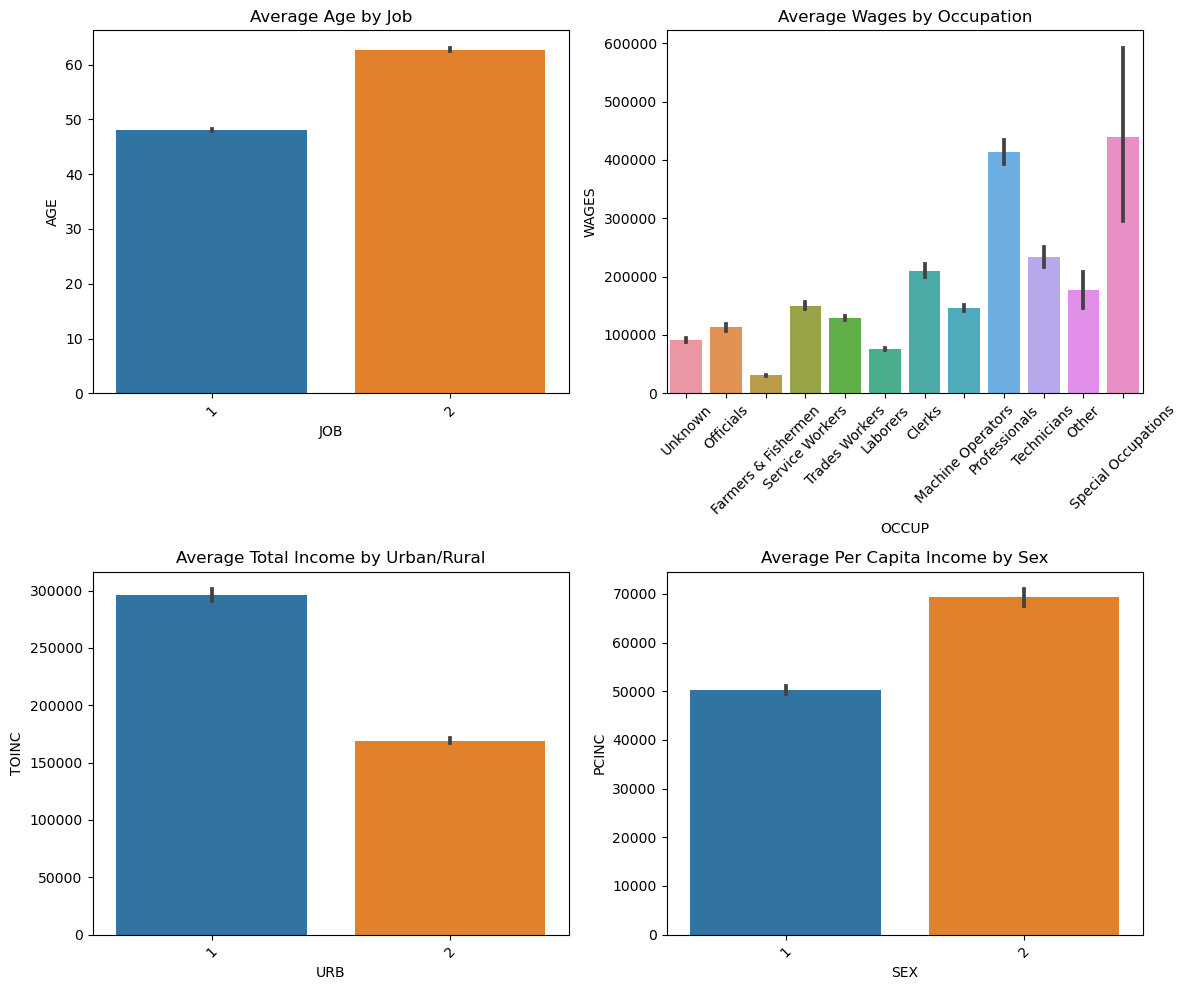

In [82]:
# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar plot: AGE vs. JOB (mean age per job category)
sns.barplot(x='JOB', y='AGE', data=df_clean, ax=axes[0, 0], estimator=lambda x: x.mean())
axes[0, 0].set_title("Average Age by Job")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Bar plot: WAGES vs. OCCUP (mean wages per occupation)
sns.barplot(x='OCCUP', y='WAGES', data=df_clean, ax=axes[0, 1], estimator=lambda x: x.mean())
axes[0, 1].set_title("Average Wages by Occupation")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Bar plot: TOINC vs. URB (mean total income per urban/rural classification)
sns.barplot(x='URB', y='TOINC', data=df_clean, ax=axes[1, 0], estimator=lambda x: x.mean())
axes[1, 0].set_title("Average Total Income by Urban/Rural")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Bar plot: PCINC vs. SEX (mean per capita income by sex)
sns.barplot(x='SEX', y='PCINC', data=df_clean, ax=axes[1, 1], estimator=lambda x: x.mean())
axes[1, 1].set_title("Average Per Capita Income by Sex")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

*INSERT EXPLANATION

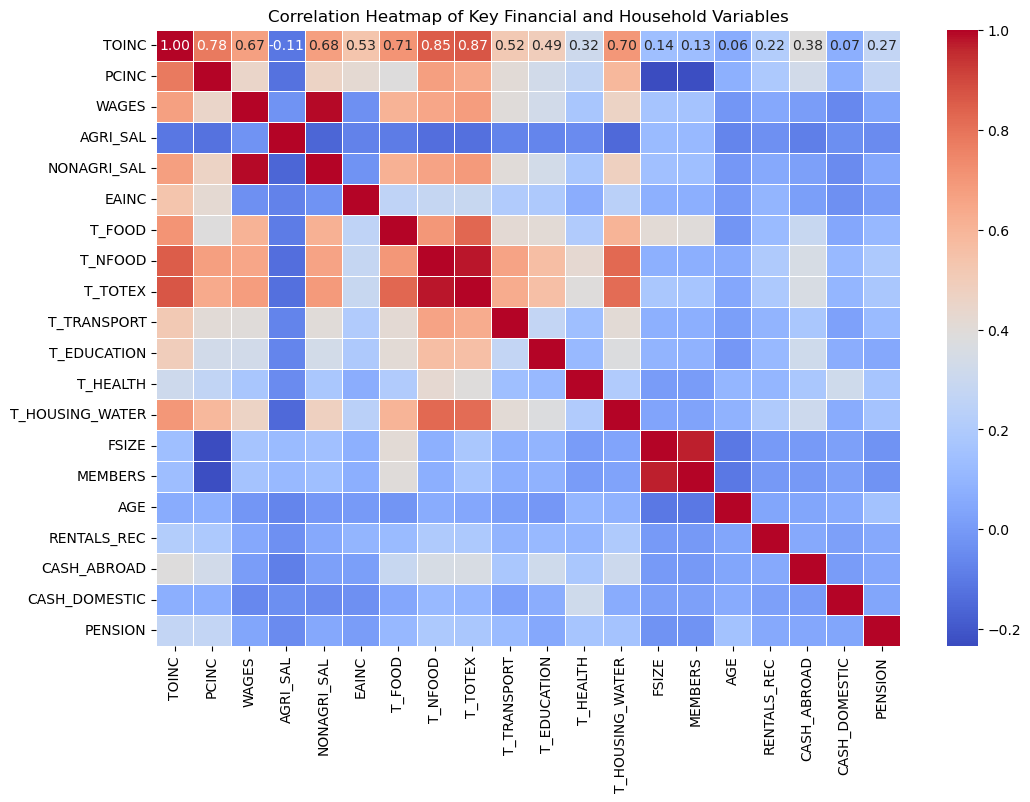

In [88]:
# Select only numerical variables
num_vars = ['TOINC', 'PCINC', 'WAGES', 'AGRI_SAL', 'NONAGRI_SAL', 
            'EAINC', 'T_FOOD', 'T_NFOOD', 'T_TOTEX', 'T_TRANSPORT', 
            'T_EDUCATION', 'T_HEALTH', 'T_HOUSING_WATER', 'FSIZE', 
            'MEMBERS', 'AGE', 'RENTALS_REC', 'CASH_ABROAD', 'CASH_DOMESTIC', 'PENSION']

df_corr = df_clean[num_vars].corr()  # Compute correlation matrix

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Financial and Household Variables")
plt.show()

*INSERT EXPLANATION

## **Section 6. Initial model training**